In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

In [55]:
def rot90(x):
    d = x.max()
    n = copy.deepcopy(x)
    n = n[:,::-1]
    n[:,1] = d - n[:,1]
    n = n[::-1]
    return n

def rot180(x):
    return rot90(rot90(x))

def rot270(x):
    d = x.max()
    n = copy.deepcopy(x)
    n = n[:,::-1]
    n[:,0] = d - n[:,0]
    n = n[::-1]
    return n

def change_start(x):
    return np.vstack([x[-7*x.shape[0]//8::], x[:-7*x.shape[0]//8]])

In [56]:
deflection = np.array([[0,0], [0,1], [1,1], [1,0]])
start = np.array([[0,1], [1,2], [1,4], [0,5], [1,6], [2,5], [4,5], [5,6], [6,5], [5,4], [5,2], [6,1], [5,0], [4,1], [2,1], [1,0]])

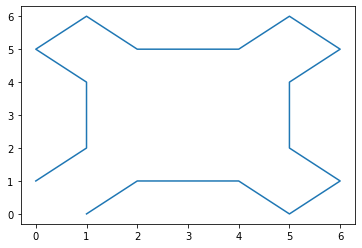

In [57]:
plt.plot([p[0] for p in start], [p[1] for p in start])

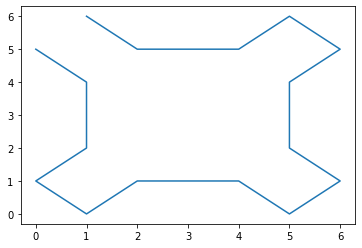

In [58]:
end = rot90(start)

plt.plot([p[0] for p in end], [p[1] for p in end])

In [71]:
itrs = 6
points = np.array([[0,1], [1,2], [1,4], [0,5], [1,6], [2,5], [4,5], [5,6], [6,5], [5,4], [5,2], [6,1], [5,0], [4,1], [2,1], [1,0]])
d = points.max()+1

for i in range(itrs-1):
    p1 = copy.deepcopy(points)
    p2 = copy.deepcopy(points)
    p3 = copy.deepcopy(points)
    p4 = copy.deepcopy(points)

    p1 = rot180(p1)
    p2 = rot270(p2)
    p2 = p2[::-1]
    p4 = rot90(p4)
    p4 = p4[::-1]

    p1 = deflection[0]*(2**i)*d + p1
    p2 = deflection[1]*(2**i)*d + p2
    p3 = deflection[2]*(2**i)*d + p3
    p4 = deflection[3]*(2**i)*d + p4

    points = np.vstack((p1,p2,p3,p4))
    points = change_start(points)

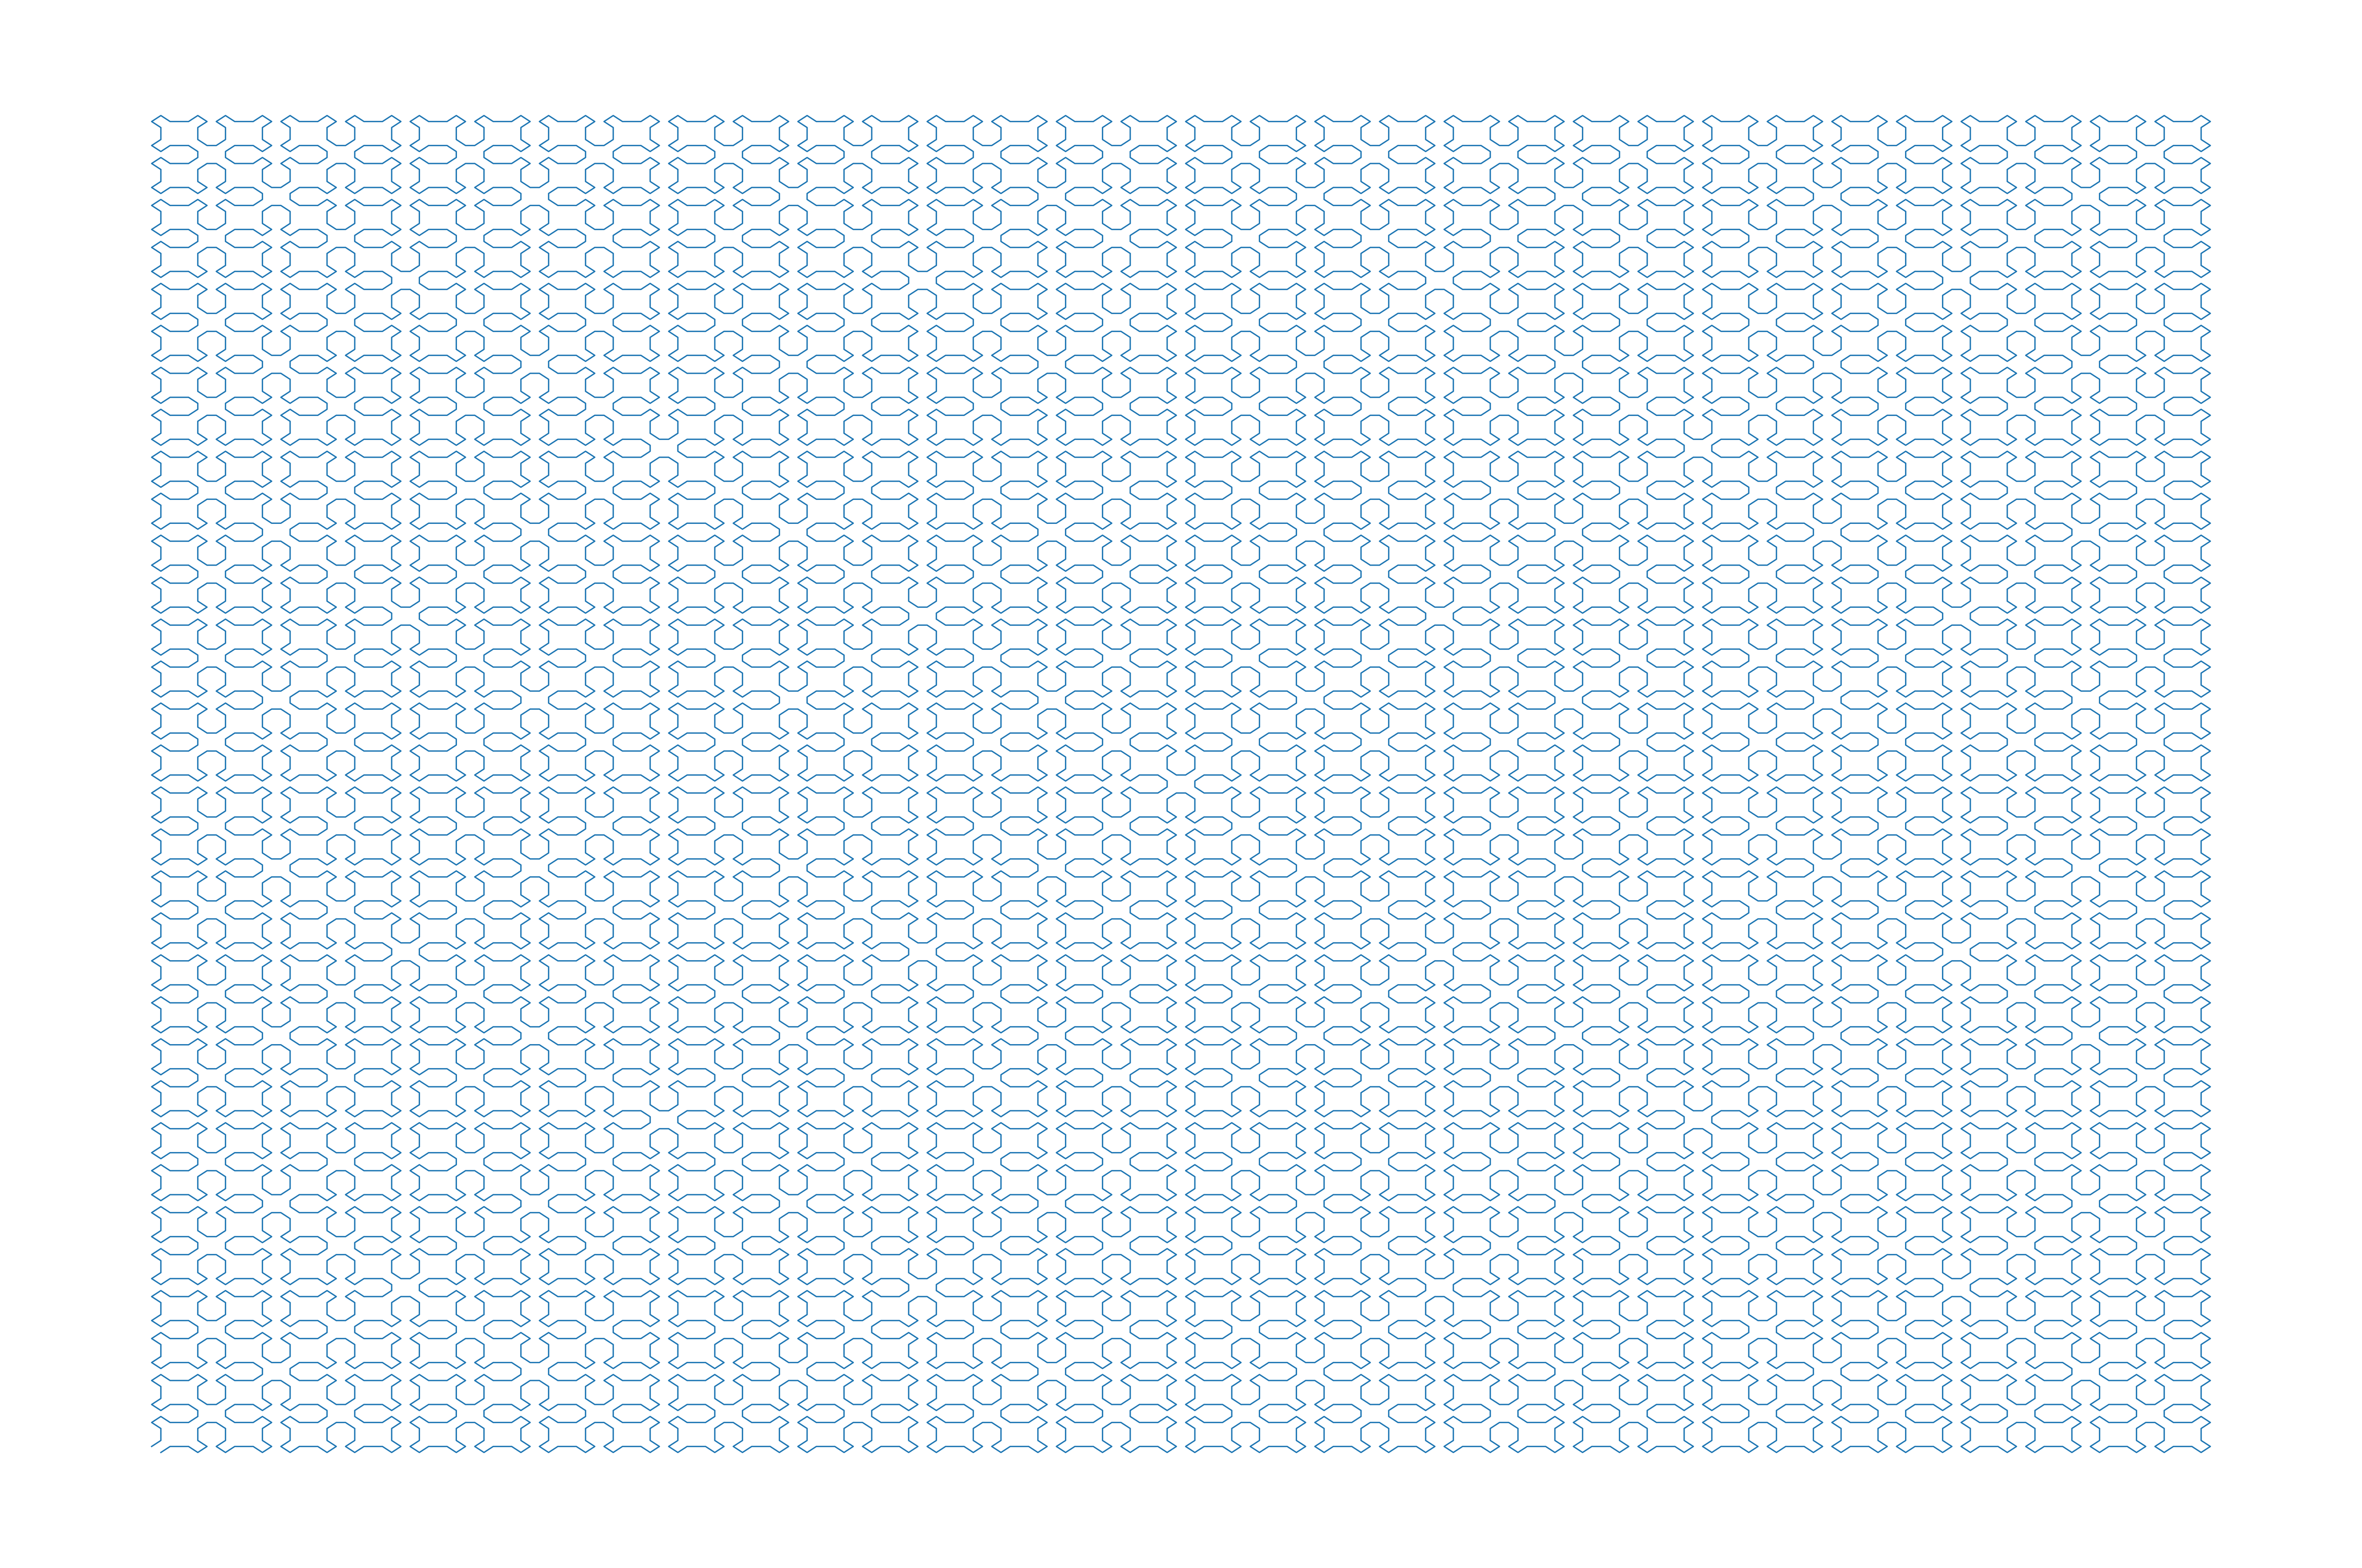

In [72]:
plt.figure(dpi=1200)
plt.axis("off")
plt.plot([p[0] for p in points], [p[1] for p in points], linewidth=0.2)